In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import powerlaw
from scipy.special import factorial
import warnings

#suppress warnings
#Ref: https://www.statology.org/runtimewarning-overflow-encountered-in-exp/#:~:text=This%20warning%20occurs%20when%20you,provides%20the%20warning%20by%20default.
warnings.filterwarnings('ignore')

In [24]:
#Load data
g_amazon = nx.read_gml("data/graph_amazon.gml")
g_escort = nx.read_gml("data/graph_escort.gml")
g_internet = nx.read_gml("data/graph_internet.gml")

Dataset: Amazon
The average degree is: 5.529855493141971
𝛾: 1.4673205424748599
Error: 0.0008075720698336667


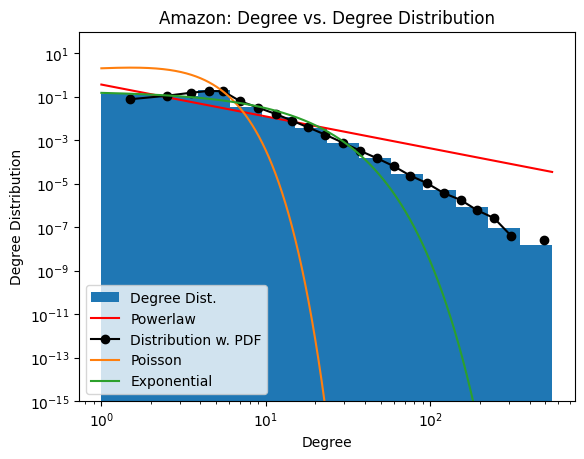

--------------------------------------------------------------------
Dataset: Escort
The average degree is: 4.667543335325762
𝛾: 1.6489019935437905
Error: 0.005016850251404289


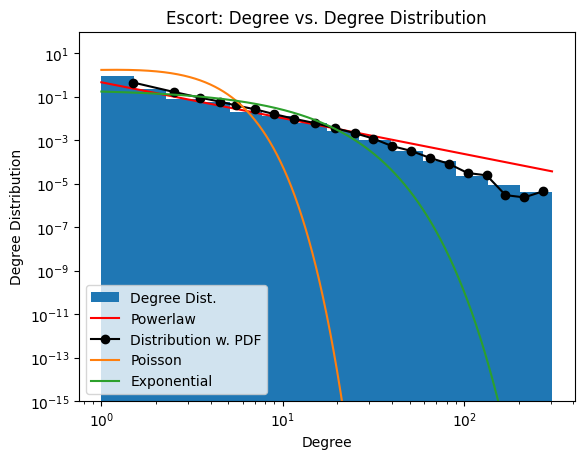

--------------------------------------------------------------------
Dataset: Internet
The average degree is: 6.197750352406432
𝛾: 1.6649249778242199
Error: 0.003566370974999353


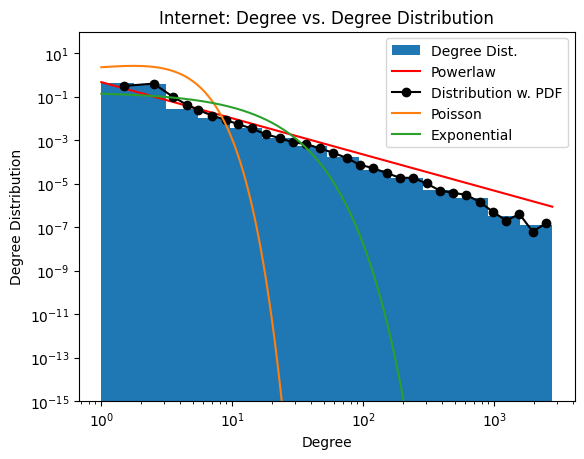

--------------------------------------------------------------------


In [60]:
#A05.1 Everyday networks are not Poisson: parameter estimation and model selection
#Task: For all given networks compute the degree distribution 𝑃(𝑘) and the average degree ⟨𝑘⟩ and use the powerlaw package to fit 𝑃(𝑘).
#1. Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘−𝛾 and the corresponding error
#2. In the same plot show: the empirical degree distribution; the power-law fit; 
# the Poisson fit and the exponential distribution with mean value equal to ⟨𝑘⟩. 
# Which distribution is more likely to describe the data?
def poisson(k, lamda):
    return ((lamda**k)/(factorial(k))) * np.exp(-k)

def expo(k, lamda):
    return lamda**(-1) * np.exp(-k/lamda)

def myfunc(x,alpha):
    return x**(-alpha)

# Super mighty function for Task 1&2......
def dist_ave_pow(name, graph):
    print("Dataset: " + name)
    #Load degrees
    g_degrees = graph.degree()
    degrees = [ g_degrees[i] for i in graph.nodes() ]

    #Compute ave. degres
    sum_deg = []
    for i in degrees:
        sum_deg.append(i)
    ave_degree = sum(sum_deg) / len(sum_deg)
    print("The average degree is: " + str(ave_degree))

    #powerlaw
    k = np.sort(np.asarray([d for d in dict(graph.degree()).values()]), )
    spacing = np.linspace(min(k),max(k),len(k))
    #Note from Teams by Carlo 04/11: 
    # "Indeed the p(x)=Kx^-a is not a proper distribution, as for x=0 it diverges."
    fit = powerlaw.Fit(k, discrete=True, xmin=1)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma

    print("𝛾: " + str(alpha))
    print("Error: " + str(sigma))

    #Create the plot
    my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 15 )
    _ = plt.hist(degrees, bins = my_bins, density = True, label="Degree Dist.") 
    fit.power_law.plot_pdf(color='r', label="Powerlaw")
    powerlaw.plot_pdf(k,color='k',marker='o', label="Distribution w. PDF")
    plt.plot(spacing,poisson(spacing,ave_degree), label="Poisson")
    plt.plot(spacing,expo(spacing,ave_degree), label="Exponential")
    plt.title(name + ": Degree vs. Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Degree Distribution")
    plt.ylim(bottom=myfunc(10, 15), top=myfunc(10,-2))
    plt.legend()
    plt.show()

    #Division between different datasets
    print("--------------------------------------------------------------------")


dist_ave_pow("Amazon", g_amazon)
dist_ave_pow("Escort", g_escort)
dist_ave_pow("Internet", g_internet)

Amazon is probably better fit with exponential.
Escort is better fit with powerlaw.
Internet is also better fit with powerlaw.

#3. What does it mean in practice for Amazon products?


In [64]:
#A05.2 Barabási-Albert model
#Task: Build networks with the Barabási-Albert model. 
# Connect 𝑚 = 3 for each new node and grow until 𝑁 = 50, 100, 500, 1000, 5000.
m = 3
N = [50, 100, 500, 1000, 5000]

glist = []
for n in N:
    g = nx.barabasi_albert_graph(n, m)
    glist.append(g)

glist

In [ ]:
#1. Compute the average clustering coefficient, assortativity,
#average shortest path length and diameter for the generated networks


In [ ]:
#2. Produce randomised versions of the same networks and
#calculate the same quantities, then plot them as functions of
#𝑁 and compare with the non-randomised ones (use log x axis)

3. Which of these measures is relatively unchanged by randomisation? Why?


In [61]:
#A05.3 Barabási-Albert model (2)
#Task: Build networks of 𝑁 = 500 nodes with the BA model, varying the number of new connections 𝑚 ∈ {2, 3, 4, 5}.
#1. Plot the degree distributions of the resulting networks
#2. Estimate the power-law fit parameters
#3. Plot the power-law exponent 𝛼 as a function of m